In [31]:
from util import * 

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [33]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [34]:
paths = gen_paths(S0, r, sigma, T, M, I)

Text(0, 0.5, 'index level')

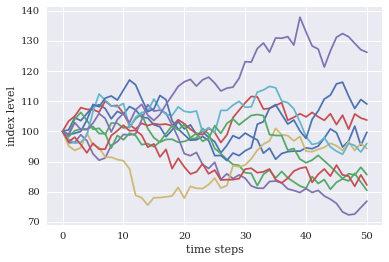

In [35]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')
# tag: normal_sim_1
# title: 10 simulated paths of geometric Brownian motion

In [36]:
log_returns = np.log(paths[1:] / paths[0:-1]) 
paths[:, 0].round(4)

array([100.    , 100.5188, 104.5474, 103.5681, 105.8989, 108.3005,
       108.8132, 107.6167, 104.1825, 106.629 , 105.6878, 108.2314,
       107.1573, 104.7453, 104.4321, 102.2084, 101.52  ,  98.2353,
       100.476 , 103.2496, 100.8098, 102.1852,  98.9421,  99.8136,
        98.0505,  96.6053,  92.8985,  95.3723,  98.5887,  97.6614,
        99.4324,  98.2409,  97.1812,  92.789 ,  94.4494,  90.7865,
        92.6691,  93.2792,  93.4774,  93.4635,  94.5393,  94.2601,
        95.1263,  97.7726, 100.8163,  99.5794,  94.8044,  96.8028,
       101.7469,  95.3611,  99.7303])

In [37]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [38]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.14681
           max         0.14733
          mean         0.00060
           std         0.02828
          skew        -0.00031
      kurtosis         0.00096


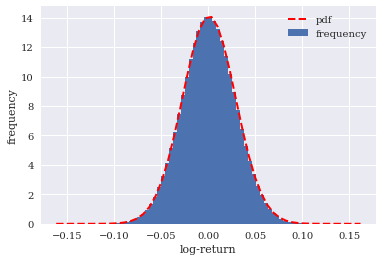

In [43]:
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         '--r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_2
# title: Histogram of log-returns and normal density function

/Users/dequaner/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'sample quantiles')

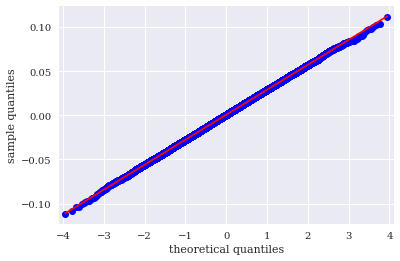

In [44]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_1
# title: Quantile-quantile plot for log returns

In [45]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [46]:
normality_tests(log_returns.flatten())

Skew of data set          -0.000
Skew test p-value          0.654
Kurt of data set           0.001
Kurt test p-value          0.489
Norm test p-value          0.712


In [83]:
df = pd.read_csv('data/NASDAQCOM.csv',index_col=0,parse_dates=True)
df = df[df.NASDAQCOM != '.']
df = df.astype('float')
df = df[df.index > pd.to_datetime('2018/01/01')]
df = df[df.NASDAQCOM != '.']
df = df.astype('float')
# df = df.join(dfdj)
# df.index
# df['return_nasdaq'] = np.log(df/df.shift())
df.dropna(inplace=True)

dfdj = pd.read_csv('data/DJIA.csv',index_col=0,parse_dates=True)
dfdj = dfdj[dfdj.DJIA != '.']
dfdj = dfdj.astype('float')
# dfdj['return_dji'] = np.log(dfdj/dfdj.shift())
df = df.join(dfdj)
log_returns = np.log(df / df.shift(1)).dropna()

### 两种画return的方式


<AxesSubplot:xlabel='DATE'>

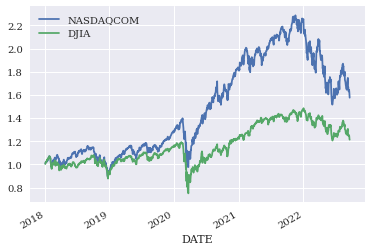

In [85]:
symbols = ['NASDAQCOM','DJIA']
# 1. log return cummulative way 
log_returns[symbols].cumsum().apply(np.exp).plot()

<AxesSubplot:xlabel='DATE'>

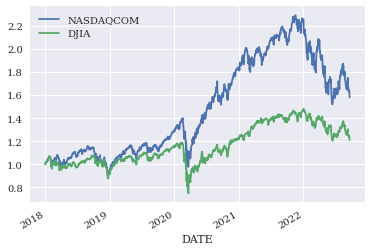

In [86]:
# 2. direct return 
(df/df.iloc[0])[symbols].plot()

array([[<AxesSubplot:title={'center':'NASDAQCOM'}>,
        <AxesSubplot:title={'center':'DJIA'}>]], dtype=object)

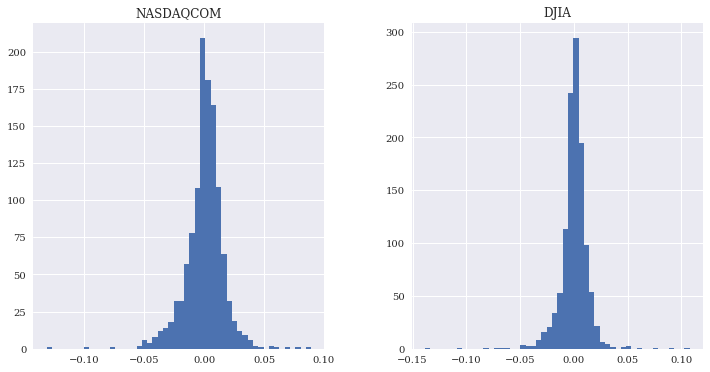

In [87]:
log_returns[symbols].hist(bins=50, figsize=(12, 6))

In [90]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol NASDAQCOM
------------------------------
     statistic           value
------------------------------
          size      1188.00000
           min        -0.13149
           max         0.08935
          mean         0.00038
           std         0.01603
          skew        -0.75924
      kurtosis         7.40183

Results for symbol DJIA
------------------------------
     statistic           value
------------------------------
          size      1188.00000
           min        -0.13842
           max         0.10764
          mean         0.00016
           std         0.01385
          skew        -0.99086
      kurtosis        18.68956


/Users/dequaner/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'sample quantiles')

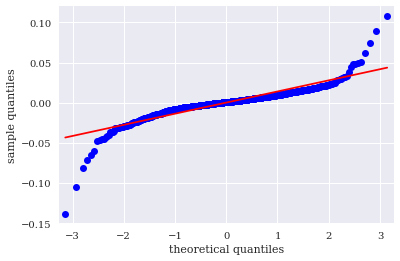

In [91]:
sm.qqplot(log_returns['DJIA'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [92]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol NASDAQCOM
--------------------------------
Skew of data set          -0.759
Skew test p-value          0.000
Kurt of data set           7.402
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol DJIA
--------------------------------
Skew of data set          -0.991
Skew test p-value          0.000
Kurt of data set          18.690
Kurt test p-value          0.000
Norm test p-value          0.000
